# Описание проекта

У нас на руках имеются датафреймы со списком гипотез, а также - с результатами А/В-теста. Задача - приоритезировать имеюшиеся гипотезы способами ICE и  RICE, а также проанализировать результаты проведенного А/В-теста.

### Подготовка к работе

Для начала, импортируем нужные библиотеки, приведем дату и время к нужному формату и посмотрим на датафреймы:

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
import warnings

In [2]:
register_matplotlib_converters()

In [3]:
hypothesis = pd.read_csv(r'C:\Users\polin\Downloads\hypothesis.csv')
orders = pd.read_csv(r'C:\Users\polin\Downloads\orders.csv')
visitors = pd.read_csv(r'C:\Users\polin\Downloads\visitors.csv')

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

display(
    hypothesis,
    orders,
    visitors,
    hypothesis.info(),
    orders.info(),
    visitors.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFr

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


None

None

None

In [4]:
min_date = visitors['date'].min()
max_date = visitors['date'].max()

display(min_date, max_date)

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [5]:
people_in_groups = orders.pivot_table(index = 'group', values = 'visitorId', aggfunc = ['nunique'])
people_in_groups

,nunique
,visitorId
group,
A,503
B,586


Можно увидеть, что у нас есть данные о пользователях в промежутке с первого августа 2019 годв по тридцать первое августа 2019 года, соответственно, наблюдения проводились в течение месяца. Численность группы А составляет 503 человекка, а группы В - 586 человек.

### Приоритезация гипотез

Приоритезируем имеющиеся гипотезы способами ICE и RICE, отсортируем данные по убыванию показателей приоритетности:

In [6]:
hypothesis.columns = hypothesis.columns.str.lower()

hypothesis['ICE'] = (hypothesis['confidence']*hypothesis['impact'])/hypothesis['efforts']
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['confidence']*hypothesis['impact'])/hypothesis['efforts']

display(
    hypothesis[['hypothesis', 'ICE', 'RICE']].sort_values(by='ICE', ascending=False),
    hypothesis[['hypothesis', 'ICE', 'RICE']].sort_values(by='RICE', ascending=False)
)

,hypothesis,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000,16.2
0,"Добавить два новых канала привлечения трафика,...",13.333333,40.0
7,Добавить форму подписки на все основные страни...,11.200000,112.0
6,Показать на главной странице баннеры с актуаль...,8.000000,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000,56.0
1,"Запустить собственную службу доставки, что сок...",2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333,4.0
3,"Изменить структура категорий, что увеличит кон...",1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000,3.0


,hypothesis,ICE,RICE
7,Добавить форму подписки на все основные страни...,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000,3.0


Итак, в топ-5 приоритезации ICE попали гипотезы под номерами 8, 0, 7, 6 и 2, а в топ-5 RICE - 7, 2, 0, 6 и 8 - в целом, как мы видим, в топ-5 обоих способов приоритезации входят одни и те же гипотезы. Различие обусловлено тем, что фреймворк RICE помимо параметров impact (влияние), confidence (уверенность) и effort (сложность исполнения), учитывает также и reach (охват), который отвечает за масштабность вводимых изменений - чем больше людей затронет гипотеза, тем выше параметр reach. 

### Анализ результатов А/В-теста

Построим график кумулятивной выручки по группам:

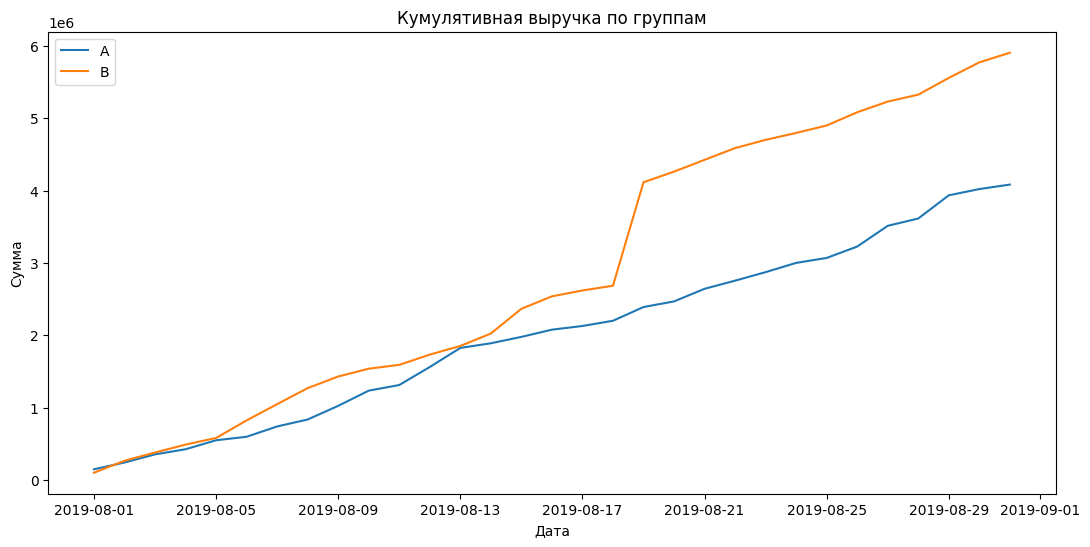

In [7]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA  = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']]

plt.figure(figsize=(13,6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Сумма')
plt.legend();

Как мы видим, в центре графика группа В показывает резкий рост, и до конца сохраняет лидирующие показатели. Однако, поскольку мы видим резкий скачок роста, то есть вероятность наличия аномалий.

Посмотрим на данные по среднему чеку:

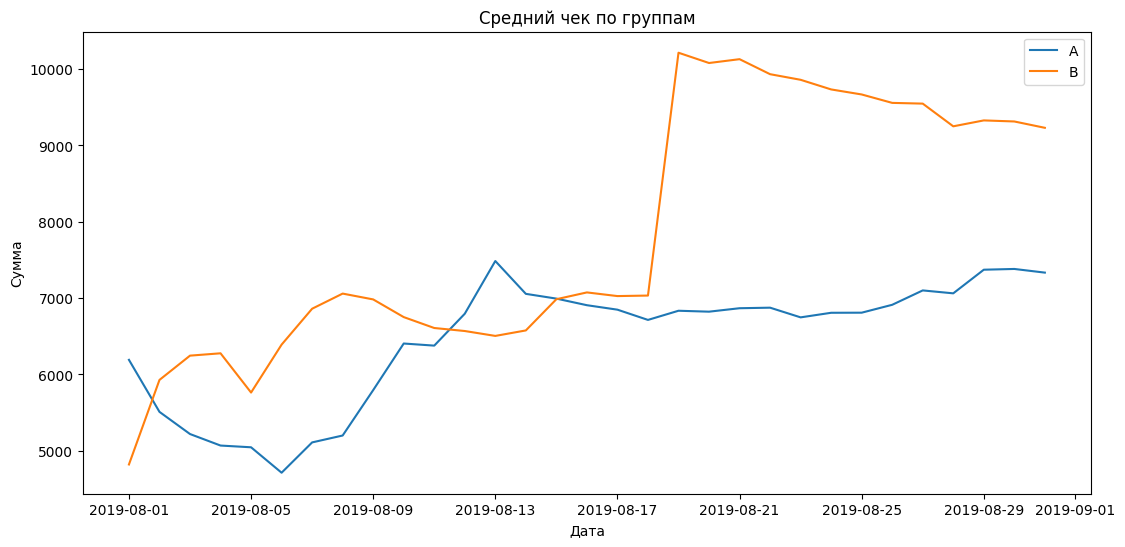

In [8]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]
plt.figure(figsize=(13,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Сумма')
plt.legend(); 

Как и на предыдущем графике, можно увидеть, что у группы В показатели лучше, чем у группы А, однако, судя по графику, имели место быть аномальные заказы, которые повлияли на общую картину.

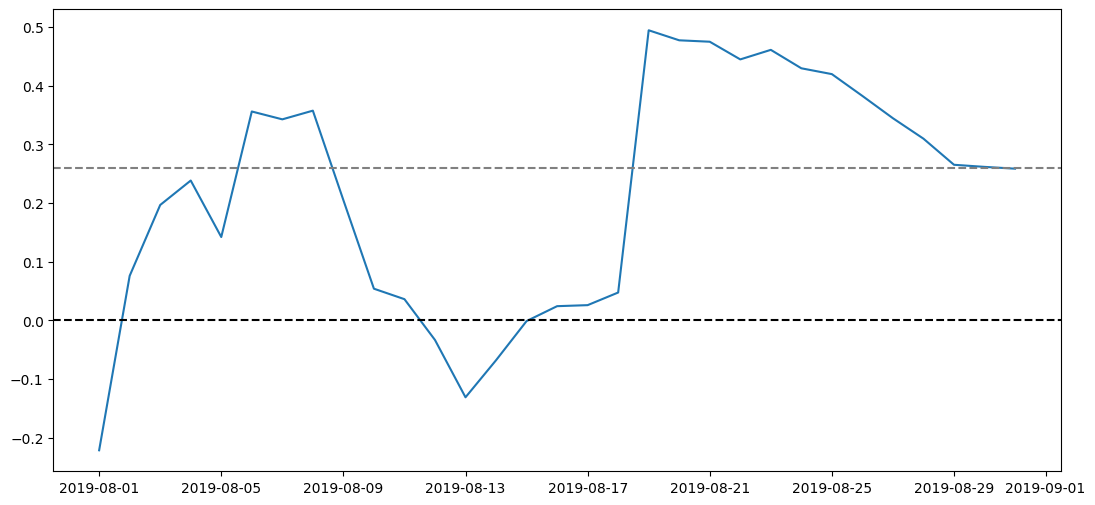

In [9]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(13,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.26, color='grey', linestyle='--');

Факт наличия аномалий подтверждает и неравномерность графика относительного изменения кумулятивного среднего чека группы B к группе A, также, можно заметить, что на короткий промежуток времени - примерно с 11 до 16 числа, - группа А вышла в лидеры.

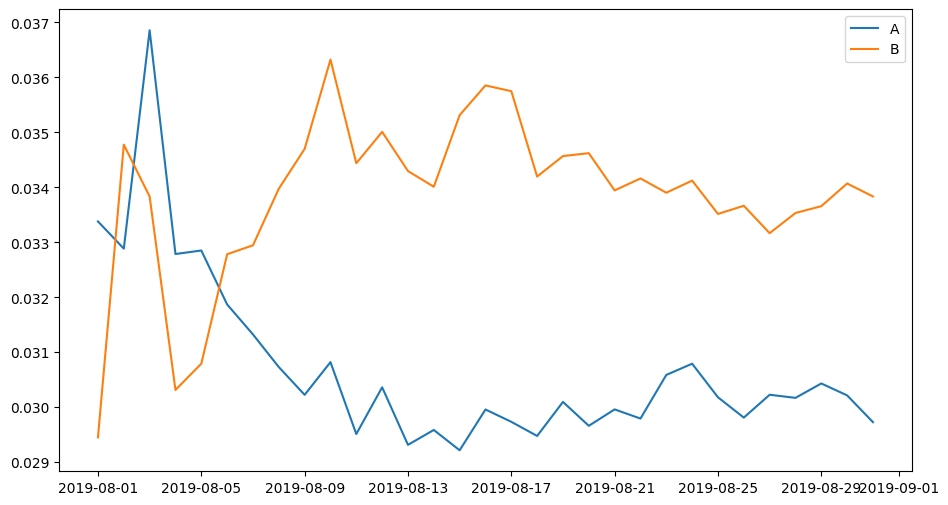

In [10]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(11,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

Видно, что в начале группа А имела лучшие показатели конверсии, чем группа В, однако, после стабилизациии показателей, группа В показала лучшие резульатаы конверсии.

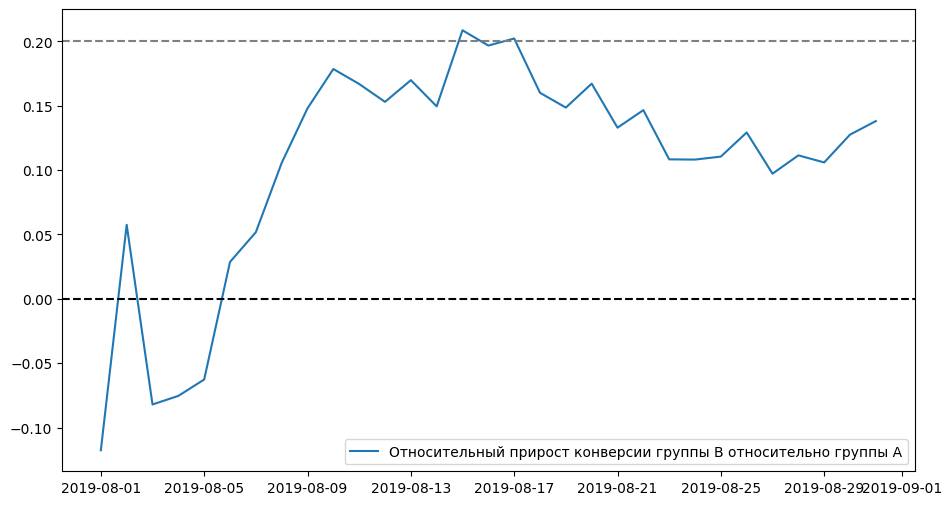

In [11]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(11,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

На этом графике также видно, что группа В показывает лучшие результаты конверсии в период с 2019.08.05 по 2019.08.17, после - конверсия начала снижаться, но начиная с 2019.08.29 начала расти снова. Иными словами, нельзя сказать, что показатели окончательно стабилизировались и не скачут.

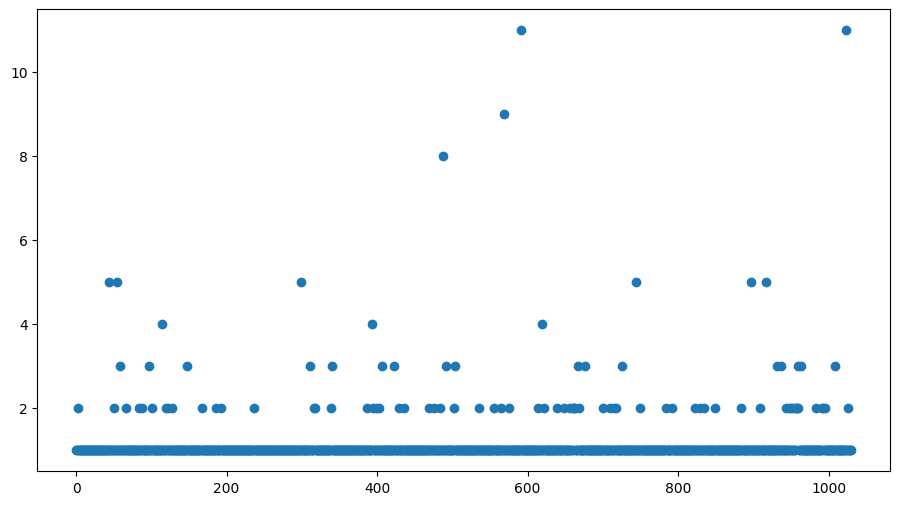

In [12]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'transactions']

plt.figure(figsize=(11,6))

x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['transactions'])

In [13]:
np.percentile(ordersByUsers['transactions'], [90, 95, 99])

array([1., 2., 4.])

Видно, что большая часть пользователей совершает от одной до четырех покупок, однако, есть и такие, кто совершил до двенадцати.

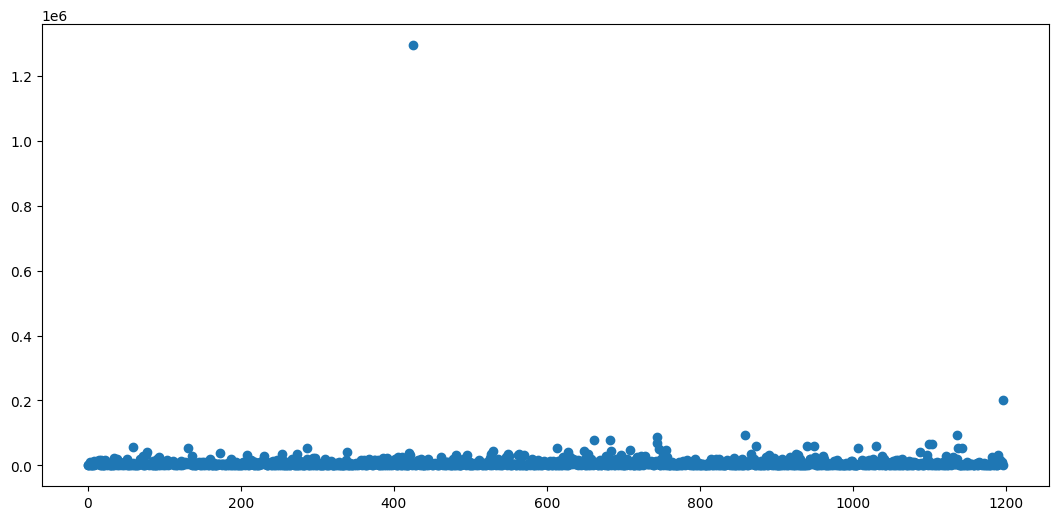

In [14]:
plt.figure(figsize=(13,6))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

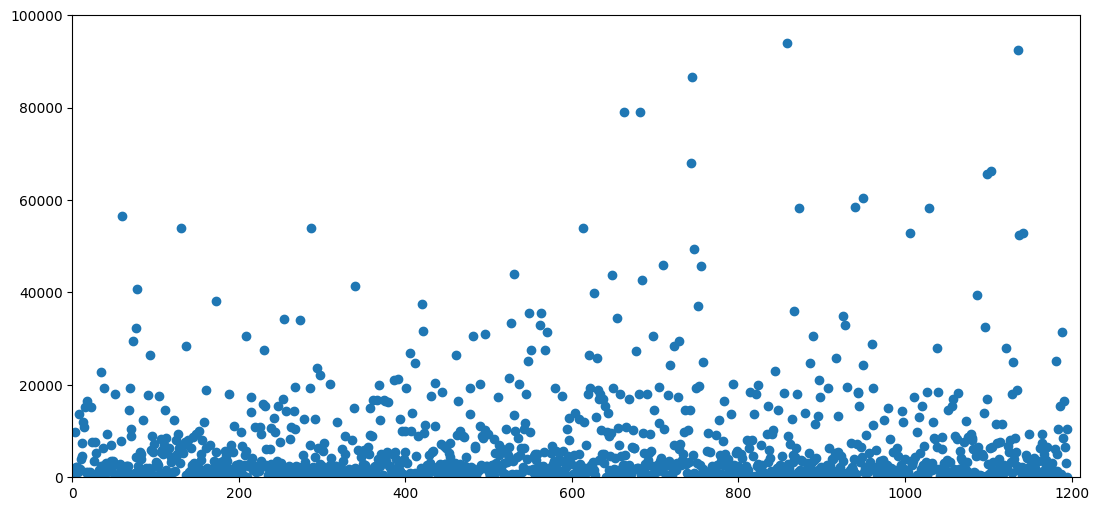

In [15]:
plt.figure(figsize=(13,6))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.axis([0,1210, 0, 100000])
plt.scatter(x_values, orders['revenue'])

In [16]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Также, мы видим, что большая часть заказов лежит в пределах до 28000, и что имеются аномальные выбросы.

Посмотрим на статистическую значимость различий в конверсии между группами по «сырым» данным:

In [17]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [18]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

display('P-value:', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

display('Относительный прирост среднего группы В к конверсии группы А:', "{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

'P-value:'

'0.01679'

'Относительный прирост среднего группы В к конверсии группы А:'

'0.138'

Итак, наша нулевая теория - различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть. Мы видим, что p-value значительно ниже 0.05, что позволяет отвергнуть нулевую гипотезу. Относительный прирост среднего группы В к конверсии группы А равен 13.8%. 

Также посмотрим, как обстоит дело со средним чеком в обоих группах. Наша нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [19]:
display(
    'P-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]),
    'Относительный прирост среднего чека группы В к среднему чеку группы А:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)
)

'P-value:'

'0.729'

'Относительный прирост среднего чека группы В к среднему чеку группы А:'

'0.259'

P-value выше 0.05 - следовательно, нет статистических различий среднего чека между группами. Относительный прирост среднего чека группы B к группе А составляет целых 26% - это весомый повод заподозрить аномалии.

Выделим пользователей с аномальными показателями и пересчитаем показатели статистической значимости:

In [20]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head(5)

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
Name: visitorId, dtype: int64

In [21]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

display(
    'P-value:', '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]),
    'Относительный прирост среднего группы В к конверсии группы А:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)
)

'P-value:'

'0.01884'

'Относительный прирост среднего группы В к конверсии группы А:'

'0.144'

Наша нулевая теория - различий в среднем количестве заказов между группами нет. Мы видим, что p-value по-прежнему значительно ниже 0.05, что позволяет отвергнуть нулевую гипотезу. Очищенный относительный прирост среднего группы В к конверсии группы А равен 14.4% - и это лучший показатель по сравнению с "сырыми" данными, где прирост составлял 13.8%. 

In [22]:
display(
    'P-value:', '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    ),
     'Относительный прирост среднего чека группы В к среднему чеку группы А:', "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

'P-value:'

'0.979'

'Относительный прирост среднего чека группы В к среднему чеку группы А:'

'-0.017'

Наша нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. Как мы видим, после отсечения выбросов данные значительно изменились - p-value по-прежнему значительно выше 0.05, однако относительный прирост среднего чека группы В равен -1.7% против 26%, что говорит о том, что аномально крупные заказы действительно оказали значительное влияние на средний чек.

### Вывод

Предлагаю остановить тест, признать его успешным и перейти к проверке следующей гипотезы - в этом тестировании предлагаю признать группу В более успешной, чем группа А - несмотря на тот факт, что очищенные данные по среднему чеку, немного проигрывают группе А, группа В показвает хороший прирост конверсии относительно группы А: 14.4%.